머신러닝을 통해 모델을 학습시킬 경우, 모델이 어느정도의 성능을 내느냐를 측정하는 것은 매우 중요하다. 또한, 모델은 이전에 본 적이 없는 데이터에도 일반화(Generalization)이 잘 되어 있어야 한다. 이번 포스트에서는 학습시킨 모델에 대한 성능 평가와 유효성 검증에 대해 알아보자.
* 모델의 성능 : 해결해야할 문제의 종류 - 분류(Classification) / 회귀(Regression) - 에 따른 평가 지표 선택
* 모델의 일반화(Generalization) : Bias-Variance / Overfitting 문제

# 모델 선정

모델을 선정하는 것은 머신러닝으로 어떠한 문제를 해결할 것인가에 달려있다.  
대표적인 머신러닝 문제 유형과 그 문제 유형을 해결하기 위한 모델들로는
* 분류
    * Naive Bayes
    * SVM
    * Decision Tree
    * Logistic Regression
    * ETC
* 회귀
    * Linear Regression
    * Genenralized Linear Regression
    * Decision Tree
    * ETC
* 비지도학습
    * K-Means
    * Association Rules
    * ETC  
    
등이 있다.

# 모델 성능 평가
모델 성능 평가는 모델의 성능을 검증하는 것이다. 이를 위해서는 모델의 목표와 사용된 모델링 기법 모두에 적절한 성능 평가 지표를 선택해야 한다.

## 회귀 모델 평가 지표
회귀 모델은 수치를 예측하는 모델으로, 잔차(residuals)라고하는 실제 값과 예측 값의 차이를 가지고 모델의 성능을 평가한다.

In [ ]:
# Load library
library(ggplot2) 

# Load data
data(mtcars)

# Train simple linear model
lm.fit <- lm(mpg ~ wt, data = mtcars)

# Predict
mtcars$pred <- predict(lm.fit, newdata = mtcars)

# Plot residuals
ggplot(mtcars, aes(wt, mpg)) + geom_point() +
  geom_line(aes(wt, pred), color = 'blue') +
  geom_segment(aes(wt, pred, yend = mpg, xend = wt)) +
  scale_y_continuous('')

![잔차 그래프](https://www.dropbox.com/s/ftnbyq7qs4y6ou9/residuals.png?raw=1)

### RMSE(Root Mean Square Error)
RMSE는 가장 일반적인 회귀 모델 평가 지표로, 실제 값과 예측 값의 차이를 제곱하고 평균을 구한 후 다시 제곱근을 적용해서 구한다.
$$\mathbf{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i - \hat{x_i})^2}$$
RMSE 외에도 MAE(Mean Absolute Error), MAPE(Mean Absolute Percentage Error) 등이 있다.

### 결정계수($R^2$)
결정 계수는 회귀 모델의 설명력은 표현하는 지표로, 모델에 의해 설명되는 y 분산의 비율로 간주된다. 0에 가까울수록 설명력이 낮고, 1에 가까울수록 설명력이 높다.
$$ \mathbf{R^2} = \frac{\mathbf{SSR}}{\mathbf{SST}} = 1 - \frac{\mathbf{SSE}}{\mathbf{SST}}$$로, SST와 SSR이 얼마나 비슷한지, SSE가 얼마나 다른지에 따라 결정된다. 자세한 설명은 [Linear Regression]()을 참고.

In [7]:
# R Squared
print(paste("R Squared : ", summary(lm.fit)$r.squared))

# Adjusted R Squared
print(paste("Adjusted R Squared : ", summary(lm.fit)$adj.r.squared))

[1] "R Squared :  0.752832793658264"
[1] "Adjusted R Squared :  0.744593886780207"


## 분류 모델 평가 지표
분류 모델은 2개 또는 그 이상의 범주를 예측하는 모델이다.  
분류 모델의 평가 지표로는 
* 정확도(Accuracy)
* 정밀도(Precision)
* 재현율(Recall)
* F1 Score
* 민감도와 특이도  

등으로, 평가 지표의 선택은 해결해야 하는 문제에 따라 결정해야 한다.  
분류 모델의 성능을 측정하기 위해 사용하는 유용한 도구로 혼동 행렬(Confusion Matrix)를 사용한다.

### 혼동 행렬(Confusion Matrix)
혼동 행렬은 실제 알려진 데이터 범주에 대해 분류 모델의 예측을 정리한 표로, 각각의 예측 유형별로 실제 데이터가 얼마나 발생했는지 확인할 수 있다. 

혼동 행렬     | P'(Predict)  | N'(Predict) 
--------------|--------------|------------
**P**(Actual) |True Positive(**TP**) |False Negative(**FN**)   
**N**(Actual) |False Positive(**FP**)|True Negative(**TN**)   

혼동 행렬에서 True / False는 예측이 맞았는지/틀렸는지를 나타내고, Positive / Negative는 예측한 값이 양성(=1)인지 / 음성(=0)인지를 나타낸다.  
즉, 
* TP : 1이라고 예측하고 실제 값이 1인 경우
* FP : 1이라고 예측하고 실제 값이 0인 경우
* TN : 0이라고 예측하고 실제 값이 0인 경우
* FN : 0이라고 예측하고 실제 값이 1인 경우
이다.  

주로 관심이 가는 범주를 1로 간주하고 아닌 것은 0으로 간주한다.

연수입이 \$50K를 넘는지 안 넘는지를 분류하는 예제를 통해 혼동 행렬을 살펴보자. 이 데이터는 [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.html)에서 가져왔다. 연령, 직업, 교육, 결혼상태, 성별, 인종 등을 변수로 연수입을 간략히 예측하는 분류 모델을 만들어보고 혼동 행렬을 만들었다. 혼동 행렬은 <code>caret</code> 패키지의 <code>confusionMatrix</code>를 사용하면 쉽게 구할 수 있다.

In [5]:
# Load libraries
library(caret)
library(rpart)
library(e1071)

# Load data
adult <- read.csv("adult.csv")

# Split data
train.idx <- createDataPartition(adult$target, p = 0.7, list = F)
train <- adult[train.idx,]
test <- adult[-train.idx,]

# Train decision tree
dt.fit <- rpart(target ~ ., data = train, method = "class")

# Predict
train.pred <- predict(dt.fit, newdata = train, type = "class")
test.pred <- predict(dt.fit, newdata = test, type = "class")

In [8]:
print(confusionMatrix(data = test.pred, reference = test$target, mode = "everything"))

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   7114  1234
     >50K     302  1118
                                          
               Accuracy : 0.8428          
                 95% CI : (0.8354, 0.8499)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5026          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9593          
            Specificity : 0.4753          
         Pos Pred Value : 0.8522          
         Neg Pred Value : 0.7873          
              Precision : 0.8522          
                 Recall : 0.9593          
                     F1 : 0.9026          
             Prevalence : 0.7592          
         Detection Rate : 0.7283          
   Detection Prevalence : 0.8546          
      Balanced Accuracy : 0.7173          
               

### 정확도(Accuracy)
정확도는 분류 모델의 성능을 측정하는데 사용하는 가장 일반적인 지표로, 정확히 분류된 항목의 숫자를 전체 항목의 숫자로 나눠서 구한다.  
$$\mathbf{Accuracy} = \frac{(\mathbf{TP} + \mathbf{TN})}{(\mathbf{TP} + \mathbf{TN} + \mathbf{FP} + \mathbf{FN})}$$
위의 예제에서 정확도를 계산해보면,
$$\frac{(7114 + 1118)}{(7114 + 1234 + 302 + 1118)} = 0.8428$$로, 약 84%의 정확도를 가지고 있다. 즉, 전체 사람들 중 약 16%는 잘못 예측되었다.

#### 클래스 불균형(Unbalanced Class) 문졔
암 진단과 같은 1과 0의 숫자가 매우 크게 차이가 나는 경우를 클래스 불균형 문제라고 한다. 이러한 문제에서는 대부분의 경우(99% 이상)이 0이기 때문에 정확도를 평가 지표로 하는 것은 좋은 방법이 아니다. [클래스 불균형]() 참고.

### 정밀도(Precision)
정밀도는 양성(=1)으로 예측한 것이 얼마나 정확한지를 판별하는 지표로, 확인을 위한 측정 도구이다.
$$\mathbf{Precision} = \frac{\mathbf{TP}}{(\mathbf{TP} + \mathbf{FP})}$$
위의 예제에서 정밀도를 계산해보면,
$$\frac{7114}{(7114 + 1234)} = 0.8522$$로, 약 85%의 정밀도를 가지고 있다. 즉, 연수입이 \$ 50K 이하(= 양성)라고 예측된 사람들 중 약 15%는 연 수입이 \$ 50K 이상으로 잘못 예측되었다.  


### 재현율(Recall) / 민감도(Sensitivity) / 참양성률(True Positive Rate)
재현율은 실제 양성(=1)인 것들 중에서 양성이라고 예측한 비율을 나타내는 지표로, 유용성에 대한 측정 도구이다.
$$\mathbf{Recall} = \frac{\mathbf{TP}}{(\mathbf{TP} + \mathbf{FN})}$$
위의 예제에서 정밀도를 계산해보면,
$$\frac{7114}{(7114 + 302)} = 0.9593$$으로, 약 96%의 재현율을 가지고 있다. 즉, 실제 연수입이 \$ 50K 이하인 사람들 중 약 4%만이 $ 50K 이상으로 잘못 예측되었다.

### F1 Score
F1 Score는 정밀도와 재현율의 조합으로 된 지표이다.
$$ \mathbf{F1} = \frac{\mathbf{Precision} \times \mathbf{Recall}}{(\mathbf{Precision} + \mathbf{Recall})}$$
위의 예제에서 F1 Score를 계산해보면,
$$\frac{0.8522 \times 0.9593}{(0.8522 + 0.9593)} = 0.9026$$이다.

### 특이도(Specificity) / 참음성률(True Negative Rate)
특이도는 실제 음성(=0)인 것들 중에서 음성이라고 예측한 비율을 나타내는 지표이다.
$$\mathbf{Specificity} = \frac{\mathbf{TN}}{(\mathbf{TN} + \mathbf{FP})}$$
위의 예제에서 특이도를 계산해보면,
$$\frac{1118}{(1118 + 1234)} = 0.4753$$으로, 약 47%이다.

민감도와 특이도는 어느 범주를 양성(=1)로 두느냐에 따라 서로 바뀌게 된다. 또한 null 분류 모델(모든 값을 양성 또는 음성으로 예측하는 모델)에서 민감도 또는 특이도 둘 중 하나는 항상 0이 된다. 그래서 유용하지 않은 분류 모델에서는 이 두 가지 중 적어도 하나의 값은 항상 낮은 값을 갖게 된다.

측정 도구     | 수식                            | 예시 
--------------|---------------------------------|---------
정확도        | (TP + TN) / (TP + FP + TN + FN) | 0.8428
정밀도        | TP / (TP + FP)                  | 0.8522
재현율        | TP / (TP + FN)                  | 0.9593
특이도        | TN / (TN + FP)                  | 0.4753

### 수신기 작동 특성(Receiver Operating Characteristic, ROC Curve)
대부분의 분류 모델은 $\hat{y_i} = 0, 1$을 직접 산출하지 않고, [0, 1]구간 사이의 값을 가진 확률값 $\hat{u_i}$을 계산하고, 이 확률이 특정 threshold/cutoff를 넘었을 때 1로 최종 예측하게 된다.
$$\hat{y_i} = 1, \text{if } \hat{u_i} > \text{threshold}$$
$$\hat{y_i} = 0, \text{if } \hat{u_i} \leq \text{threshold}$$
ROC 곡선은 이렇게 threshold를 변화하면서 True Positive Rate과 False Positive Rate을 그린 곡선이다. threshold가 1이면 모든 관측치를 Negative로 예측해서 TPR = FPR = 0이 된다. 반대로 threshold가 0이면 모든 관측치를 Positive로 예측해서 TPR = FPR = 1이 된다. ROC 곡선은 주어진 FPR에 대해 TPR이 높을수록 더 정확한 것이므로 ROC 곡선이 위에 있는 모델이 성능이 좋다. ROC 곡선 아래 영역(Area Under ROC, AUC)은 모델의 정확도를 하나의 숫자로 요약해주는 지표로, ROC 곡선 아래에 있는 영역의 면적이다. 0과 1 사이의 값을 가지며, 1에 가까울수록 성능이 좋음을 나타낸다.

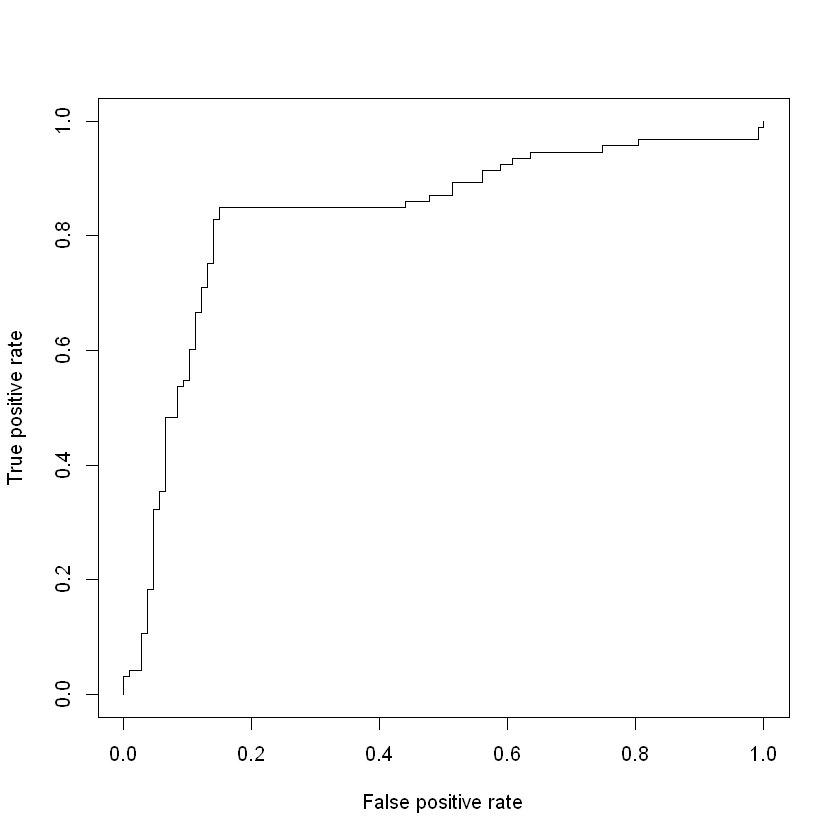

In [50]:
library(ROCR)
data(ROCR.simple)
pred <- prediction( ROCR.simple$predictions, ROCR.simple$labels)
perf <- performance(pred,"tpr","fpr")
plot(perf)

# 모델 검증
모델은 훈련 데이터에서 잘 동작할 뿐만 아니라 새로운 데이터에 대해서도 잘 작동되어야 한다. 즉, 일반화(Generalization)이 잘 되어있어야 좋은 모델이 될 수 있다. 훈련 데이터에서는 잘 동작하지만 새로운 데이터에 대해서는 잘 동작하지 않는 경우, 모델은 훈련 데이터에 과적합(Overfitting)되어있다고 한다.

과적합을 방지하고 일반화 능력이 좋은 모델을 선택하기 위해서, 데이터를 3가지 형태로 구분한다.
* 훈련 데이터 : 모델의 적합과 파라미터의 추정
* 검증 데이터 : 파라미터 튜닝, 변수 선택 및 모델 선택
* 테스트 데이터 : 모델 적합과 선택이 끝난 후 최종 모델의 성능을 측정

## 과적합(Overfitting)

### 편향(Bias) - 분산(Variance) Trade-off
머신러닝에서 모델의 에러는 두 가지로 분류할 수 있다. 바로 편향(Bias)와 분산(Variance)이다. 편향이 올라가면 분산이 내려가고, 편향이 내려가면 분산이 올라가는데 이를 편향 - 분산 trade-off라 한다.

![Bias-Variance Trade-off](https://www.dropbox.com/s/4smjjxketgwdzez/bias-variance-tradeoff.jpg?raw=1)
<center>[이미지 출처](https://tex.stackexchange.com/questions/307117/reconstructing-the-following-bias-variance-diagram)</center>

* 편향 
    * 실제 문제를 단순한 모델로 근사시킴으로 인해 발생되는 오차
    * 모델의 복잡도(complexity)가 높을수록 편향은 작고, 단순한 모델일수록 편향은 높음
* 분산 
    * 훈련 데이터가 아닌 다른 데이터를 사용하여 예측하는 경우, 예측 값이 변동되는 정도
    * 훈련 데이터는 모델을 학습시키는데 사용되므로, 다른 데이터를 사용하면 예측 값이 변동됨
    * 그러나 분산이 높으면 훈련 데이터의 변화가 작아도 예측 값이 크게 변할 수 있음
    * 모델의 복잡도가 높을수록 분산은 높음
    
    

![Overfitting](https://www.dropbox.com/s/g59jln9m3s0gpu9/overfitting_eg.jpg?raw=1)
<center>[이미지 출처](https://dadosreais.wordpress.com/2016/12/20/causal-inference-in-practice-with-observational-data-machine-learning-heterogeneity-metric-ks-x2-tests-optimize-function-metric-cache-h2o-ai/)</center>  
Bias가 높고(Inaccurate) Variance가 낮은(Robust)한 모델은 Underfitting되어 있다. Underfitting의 경우, 훈련 데이터를 사용해 예측한 값과 다른 데이터를 사용해 예측한 값의 차이는 적지만, 실제 값과의 차이는 크다.

Bias가 낮고(Flexible) Variance가 높은(Susceptible)한 모델은 Overfitting 되어 있다. Overfitting의 경우, 훈련 데이터를 사용해 예측한 값은 실제 값과 차이가 적으나, 다른 데이터를 사용해 예측한 값은 실제 값과 차이가 크다.

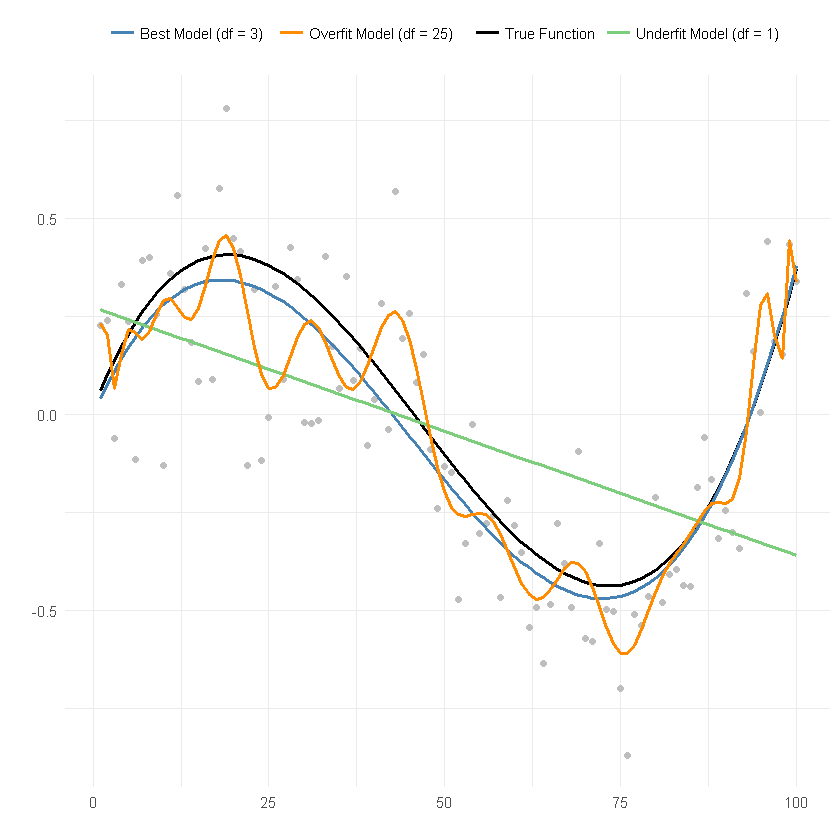

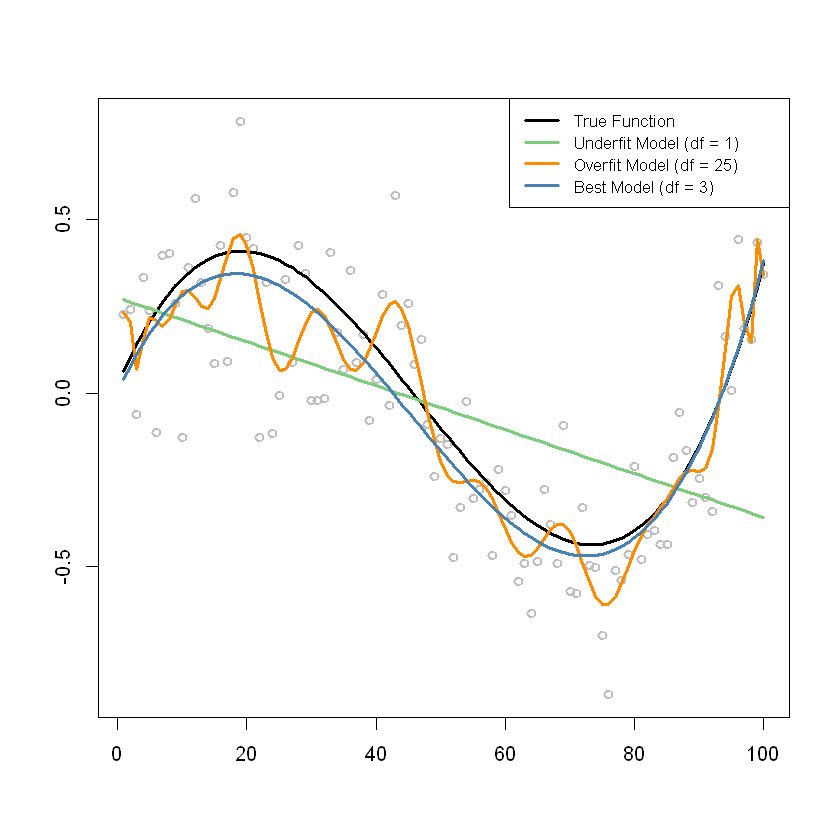

In [22]:
# Generate data for best model
true <- poly(1:100, 3) %*% c(-2, 1, 2)

# Input noise
y <- true + rnorm(100, sd = 0.2)
temp <- data.frame(x = 1:100, actual = y)

# Input true model
temp$true <- true

# Make best model
best <- lm(y ~ poly(x, 3), data = temp)
temp$best <- predict(best, temp)

# Make underfit model
underfit <- lm(y ~ x, data = temp)
temp$underfit.pred <- predict(underfit, temp)

# Make overfit model
overfit <- lm(y ~ poly(x, 25), data = temp)
temp$overfit.pred <- predict(overfit, temp)


# Plot overfitting & underfitting
ggplot(temp) + geom_point(aes(x, actual), col = 'gray') +
geom_line(aes(x, true, col = 'True Function'), size = 1) +
geom_line(aes(x, best, col = 'Best Model (df = 3)'), size = 1) + 
geom_line(aes(x, underfit.pred, col = 'Underfit Model (df = 1)'), size = 1) + 
geom_line(aes(x, overfit.pred, col = 'Overfit Model (df = 25)'), size = 1) +
xlab("") + ylab("") + theme_minimal() + 
scale_colour_manual(name = '', 
                    values =c('True Function'='black',
                              'Best Model (df = 3)'='steelblue', 
                              'Underfit Model (df = 1)'='palegreen3', 
                              'Overfit Model (df = 25)'='darkorange')) +
theme(legend.position = "top")


# Plot overfitting & underfitting
plot(temp$x, temp$actual, col = "gray", lwd = 2, xlab = "", ylab = "")
lines(temp$x, temp$true, lwd = 3, col = "black")
lines(temp$x, temp$underfit.pred, lwd = 3, col = "palegreen3")
lines(temp$x, temp$overfit.pred, lwd = 3, col = "darkorange")
lines(temp$x, temp$best, lwd = 3, col = "steelblue")
legend(x = "topright", legend = c("True Function", "Underfit Model (df = 1)", "Overfit Model (df = 25)", 
    "Best Model (df = 3)"), lwd = rep(3, 3), col = c("black", "palegreen3", 
    "darkorange", "steelblue"), text.width = 32, cex = 0.85)

위의 예시에서, 25차 다항식 모델(Overfitting)은 훈련 데이터에서는 높은 성능을 보이지만, 테스트 데이터에서는 아주 낮은 성능을 보일 것이다. 즉, 훈련 데이터와 테스트 데이터의 성능에 큰 차이가 있다. 이는 일반화 능력이 매우 낮다고 할 수 있다. 반면 1차 다항식 모델(Underfitting)은 훈련 데이터나 테스트 데이터 모두에서 낮은 성능을 보일 것이다. 3차 다항식 모델(Best)은 훈련 데이터에 대한 성능은 25차 다항식 모델보다 낮겠지만, 테스트 데이터에서는 높을 것이다. 결국, 3차 다항식 모델은 훈련 데이터와 테스트 데이터의 성능 차이가 작아 일반화 능력이 뛰어나다고 할 수 있다.

## 교차 검증(Cross Validation)


### 검증 데이터 기법
앞서 얘기한 것처럼 데이터를 훈련 데이터(50~60%) / 검증 데이터(20~25%) / 테스트 데이터(20~25%)로 구분하여 모델을 만들고 검증 및 성능 평가를 하는 방법이다. 이 방법은 데이터가 어떻게 나눠지는가에 따라 성능의 변동이 클수가 있다.


### K-fold Cross Validation
![cross validation](https://www.dropbox.com/s/8pqumzcqda0q4ke/cv.jpg?raw=1)
<center>[이미지 출처](https://www.researchgate.net/figure/The-K-fold-cross-validation-scheme-133-Each-of-the-K-partitions-is-used-as-a-test_fig10_323969239)</center>
전체 데이터를 크기가 같은 k개의 fold로 분할한다. 그리고 첫 번째 fold를 테스트 데이터, 나머지 k-1개 fold를 훈련 데이터로 구성하여 모델을 만들고 성능을 평가한다. 그 후 테스트 데이터가 되는 fold를 바꿔가면서 k번 반복 후, 성능의 평균값을 최종 성능으로 간주한다.


# A tibble: 5 x 2
   fold performance
  <int>       <dbl>
1     1       0.855
2     2       0.845
3     3       0.842
4     4       0.845
5     5       0.835


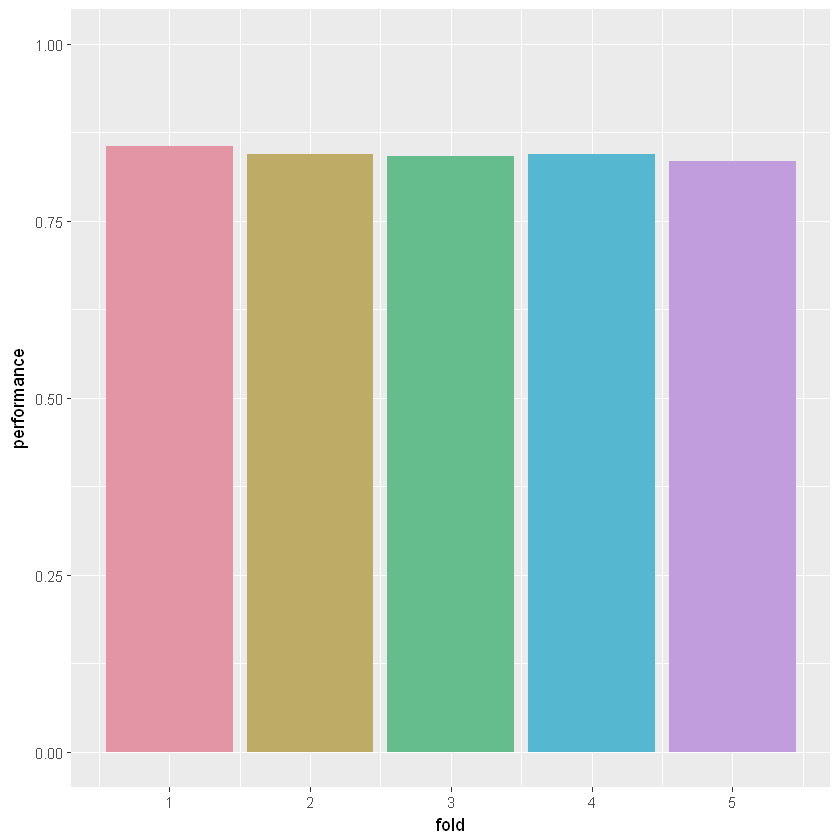

In [189]:
# Load library
library(dplyr)
library(colorspace)

# Set seed
set.seed(1990)

# Set parameters
kfolds <- 5
folds <- sample(cut(1:nrow(adult), breaks = kfolds, label = F))

# 5 folds cv
pred.dt <- data.frame()
for (k in 1:kfolds) {
    train.id <- which(folds != k)
    train_fold <- adult[train.id,]
    test_fold <- adult[-train.id,]
    dt.fit <- rpart(target ~ ., data = train_fold)
    temp <- predict(dt.fit, newdata = test_fold, type = "class")
    pred.dt <- pred.dt %>% bind_rows(data.frame(id = names(temp), fold = k, predict = temp, stringsAsFactors = F))
}

# Transform the data
row.names(pred.dt) <- pred.dt$id
pred.dt$id <- NULL
pred.dt <- pred.dt[order(as.numeric(row.names(pred.dt))),]
pred.dt$actual <- adult$target
pred.dt$result <- ifelse(pred.dt$predict == pred.dt$actual, 1, 0)

# Get model performance by fold
print(pred.dt %>% group_by(fold) %>% summarize(performance = sum(result)/n()))

# Plot the performance
pred.dt %>% group_by(fold) %>% summarize(performance = sum(result)/n()) %>% 
ggplot(aes(x = fold, y = performance)) + geom_bar(stat="identity", fill = rainbow_hcl(5)) + scale_y_continuous(limits=c(0,1))